# Box Plot and Outlier Detection using IQR

This notebook demonstrates how to create box plots and detect outliers using the Interquartile Range (IQR) method. We'll cover:

1. Creating synthetic data with known outliers
2. Understanding quartiles and IQR calculation
3. Identifying outliers using the 1.5 × IQR rule
4. Visualizing data using box plots with outliers highlighted

## Key Concepts:

- **Box Plot**: Shows data distribution through quartiles
- **Quartiles**: Q1 (25th percentile), Q2 (median), Q3 (75th percentile)
- **IQR**: Interquartile Range (Q3 - Q1)
- **Outlier Bounds**:
  - Lower bound = Q1 - 1.5 × IQR
  - Upper bound = Q3 + 1.5 × IQR

We'll implement this step by step with clear explanations at each stage.

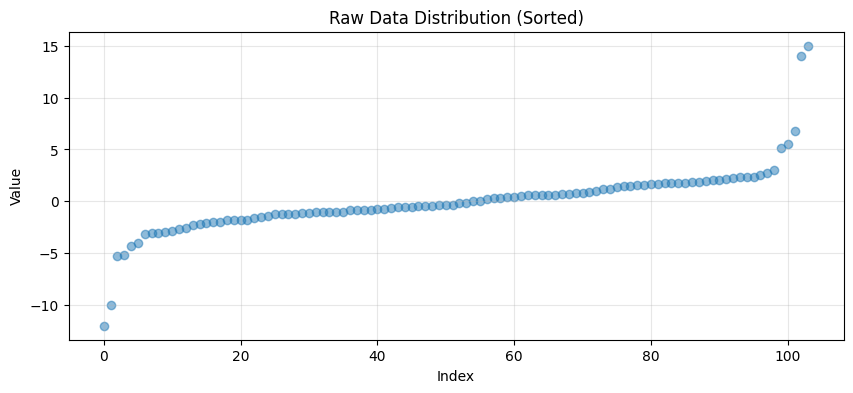

Number of data points: 104
Data range: [-12.00, 15.00]


In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data with known distribution
# Generate 100 samples in 1D (reshape from 2D output of make_blobs)
X, _ = make_blobs(n_samples=100, centers=1, n_features=1, 
                  cluster_std=2.0, center_box=(0, 0), 
                  random_state=42)
X = X.flatten()

# Add some explicit outliers
outliers = np.array([-12, 15, 14, -10])  # These will be obvious outliers
X = np.concatenate([X, outliers])

# Plot raw data distribution
plt.figure(figsize=(10, 4))
plt.scatter(range(len(X)), np.sort(X), alpha=0.5)
plt.title('Raw Data Distribution (Sorted)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Number of data points: {len(X)}")
print(f"Data range: [{X.min():.2f}, {X.max():.2f}]")

## Step-by-Step IQR Calculation and Outlier Detection

1. **Calculate Quartiles**:
   - Q1 (25th percentile): 25% of data falls below this value
   - Q2 (50th percentile/median): Middle value
   - Q3 (75th percentile): 75% of data falls below this value

2. **Calculate IQR**:
   - IQR = Q3 - Q1
   - This represents the range where 50% of our data lies

3. **Define Outlier Bounds**:
   - Lower bound = Q1 - 1.5 × IQR
   - Upper bound = Q3 + 1.5 × IQR
   - Any points outside these bounds are considered outliers

Let's implement these calculations:

In [2]:
# Calculate quartiles
Q1 = np.percentile(X, 25)
Q2 = np.percentile(X, 50)  # median
Q3 = np.percentile(X, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_mask = (X < lower_bound) | (X > upper_bound)
outliers = X[outliers_mask]
non_outliers = X[~outliers_mask]

# Print statistics
print("Summary Statistics:")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q2 (median): {Q2:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"\nOutlier Bounds:")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"\nNumber of outliers detected: {len(outliers)}")
print("Outlier values:", ", ".join(f"{x:.2f}" for x in sorted(outliers)))

Summary Statistics:
Q1 (25th percentile): -1.26
Q2 (median): -0.24
Q3 (75th percentile): 1.52
IQR: 2.78

Outlier Bounds:
Lower bound: -5.43
Upper bound: 5.69

Number of outliers detected: 5
Outlier values: -12.00, -10.00, 6.74, 14.00, 15.00


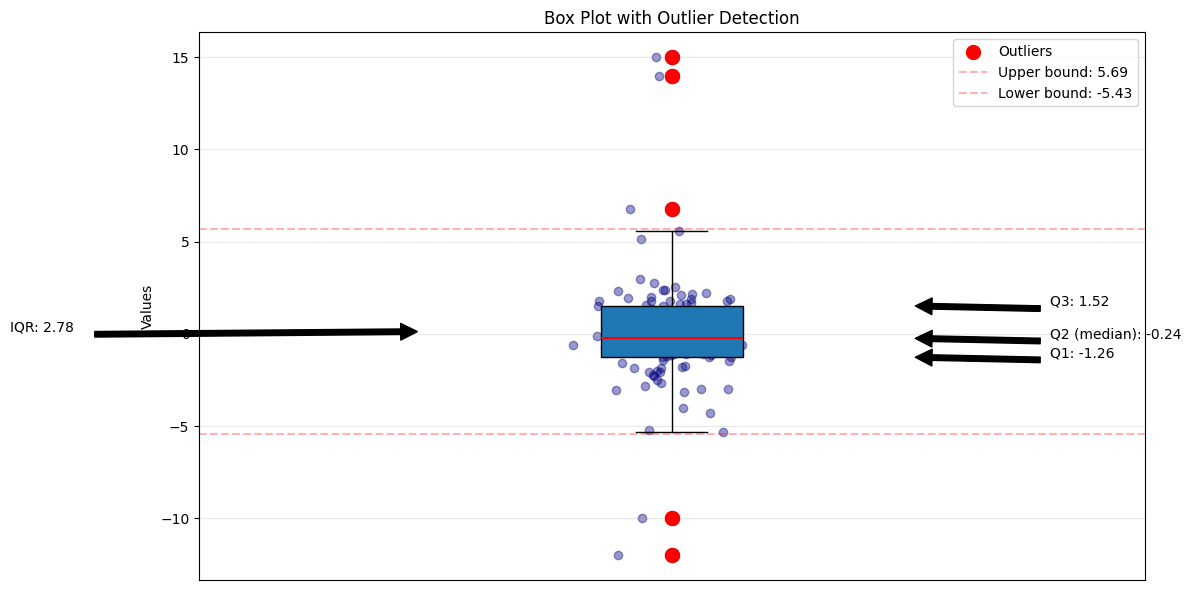

In [3]:
# Create figure and axis with larger size
plt.figure(figsize=(12, 6))

# Create box plot
bp = plt.boxplot([X], patch_artist=True,
                 medianprops=dict(color="red", linewidth=1.5),
                 flierprops=dict(marker='o', markerfacecolor='red', 
                               markersize=10, alpha=0.7))

# Add scatter plot of all points (slightly jittered for visibility)
y_jitter = np.random.normal(0, 0.04, size=len(X))
plt.scatter(np.ones_like(X) + y_jitter, X, 
           alpha=0.4, color='navy', zorder=1)

# Highlight outliers specifically
plt.scatter(np.ones_like(outliers), outliers,
           color='red', s=100, label='Outliers', zorder=2)

# Add annotations
plt.annotate(f'Q3: {Q3:.2f}', xy=(1.25, Q3),
            xytext=(1.4, Q3),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate(f'Q2 (median): {Q2:.2f}', xy=(1.25, Q2),
            xytext=(1.4, Q2),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate(f'Q1: {Q1:.2f}', xy=(1.25, Q1),
            xytext=(1.4, Q1),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Add IQR annotation
plt.annotate(f'IQR: {IQR:.2f}', xy=(0.75, Q1 + IQR/2),
            xytext=(0.3, Q1 + IQR/2),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Add outlier bounds
plt.axhline(y=upper_bound, color='r', linestyle='--', alpha=0.3,
           label=f'Upper bound: {upper_bound:.2f}')
plt.axhline(y=lower_bound, color='r', linestyle='--', alpha=0.3,
           label=f'Lower bound: {lower_bound:.2f}')

plt.title('Box Plot with Outlier Detection')
plt.ylabel('Values')
plt.grid(True, alpha=0.3)
plt.legend()

# Remove x-axis labels as they're not meaningful
plt.xticks([])

plt.tight_layout()
plt.show()

## Interpreting the Results

The box plot and outlier detection visualization above shows:

1. **Box Plot Components**:
   - The box shows the IQR (middle 50% of data)
   - Red line inside the box is the median (Q2)
   - Bottom of box is Q1, top is Q3
   - Whiskers extend to the last non-outlier points

2. **Outlier Detection**:
   - Red dashed lines show the outlier bounds
   - Points beyond these bounds (red dots) are considered outliers
   - We can see our artificially added outliers (-12, -10, 14, 15) were detected

3. **Key Observations**:
   - The box shows the main bulk of our data distribution
   - Outliers are well separated from the main distribution
   - The 1.5 × IQR rule effectively identified extreme values

## Practical Applications

This method is useful for:
- Data cleaning and preprocessing
- Identifying unusual observations
- Understanding data distribution
- Quality control in various fields

However, remember that not all outliers are errors - they might be valid but unusual observations that deserve further investigation.

## Extensions

You can extend this analysis by:
1. Using different multipliers than 1.5 for more/less strict outlier detection
2. Applying this to multiple features/columns simultaneously
3. Using robust statistics that are less sensitive to outliers
4. Combining with other outlier detection methods (e.g., z-score, isolation forest)